In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import  DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np


from math import sin, cos, sqrt
import random

In [2]:
def func(x) -> float:
  return np.sin(x * np.sqrt(4)) + np.cos(x * np.sqrt(5))

In [3]:
class Net(nn.Module):

  def __init__(self):

    self.layer_size = 128

    super(Net, self).__init__()
    self.input = nn.Linear(1, self.layer_size)
    self.hidden = nn.Linear(self.layer_size, self.layer_size)
    self.output = nn.Linear(self.layer_size, 1)

    # self.activation = torch.sigmoid
    # self.activation = torch.relu
    self.activation = torch.tanh

  def forward(self, x):
    x = self.activation(self.input(x))
    x = self.activation(self.hidden(x))
    return self.activation(self.output(x))

In [4]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        x_dtype = torch.FloatTensor
        y_dtype = torch.FloatTensor

        self.length = x.shape[0]

        self.x_data = torch.from_numpy(x).type(x_dtype).view(-1, 1)
        self.y_data = torch.from_numpy(y).type(y_dtype).view(-1, 1)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.length

In [18]:
def train_batch(net, x, y, optimizer, loss_fn):
    y_predict = net.forward(x)

    loss = loss_fn(y_predict, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.data.item()

def validate_batch(net, x, y, loss_fn):
    y_predict = net.forward(x)
    loss = loss_fn(y_predict, y)
    return loss.data.item()

def train(net, train_loader, validation_loader,optimizer, loss_fn, epochs=5):
    losses = []

    for e in range(epochs):
        epoch_losses = []
        validation_losses = []
        for x, y in train_loader:
            # print(f"X: {x} Y: {y}")
            loss = train_batch(net, x, y, optimizer, loss_fn)
            losses.append(loss)
            epoch_losses.append(loss)
        
        for x, y in validation_loader:
            loss = validate_batch(net, x, y, loss_fn)
            validation_losses.append(loss)
        
        print(f"Epoch: {e+1} Train Loss: {np.array(epoch_losses).mean():.4f} Validation Loss: {np.array(validation_losses).mean():.4f}")


    return losses

In [6]:
def test_batch(net, x, y):
    y_predict = net.forward(x)

    return y, y_predict

def test(net, loader):
    y_vectors = []
    y_predict_vectors = []

    batch_index = 0
    for x, y in loader:
        y, y_predict = test_batch(net, x, y)

        y_vectors.append(y.data.numpy())
        y_predict_vectors.append(y_predict.data.numpy())

        batch_index += 1

    y_predict_vector = np.concatenate(y_predict_vectors)

    return y_predict_vector

In [1]:
def run(dataset_train, dataset_val, dataset_test):
    batch_size = 32

    # Dataloaders    
    data_loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    data_loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
    data_loader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)
    
    # Hyperparameters
    learning_rate = 1e-2
    net = Net()
    epoch = 30
    
    # Optimizer
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.6)
    # optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    # Loss function
    loss_fn = nn.MSELoss()

    loss = train(net, data_loader_train, data_loader_val, optimizer, loss_fn, epoch)
    
    y_predict = test(net, data_loader_test)

    return loss, y_predict

In [8]:
def plot_loss(losses, show=True):
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    ax = plt.axes()
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    x_loss = list(range(len(losses)))
    plt.plot(x_loss, losses)

    if show:
        plt.show()

    plt.close()

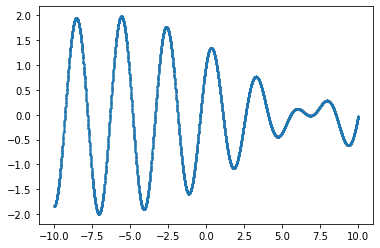

In [20]:
# Generate data
n_train = 30000 # number of training points
n_val = 4000     # number of validation datapoints
n_test = 4000     # number of testing datapoints


train_set = np.random.uniform(low=-10, high=10, size=(n_train,))
y_train_set = func(train_set)
val_set = np.random.uniform(low=-10, high=10, size=(n_val,))
y_val_set = func(val_set)
test_set = np.random.uniform(low=-10, high=10, size=(n_test,))
y_test_set = func(test_set)

fig0 = plt.figure()
plt.scatter(train_set, y_train_set, marker='o', s=0.2)
plt.show()

Train set size:  30000
Val set size:  4000
Test set size:  4000
Epoch: 1 Train Loss: 0.9510 Validation Loss: 0.8977
Epoch: 2 Train Loss: 0.8552 Validation Loss: 0.8561
Epoch: 3 Train Loss: 0.8026 Validation Loss: 0.8590
Epoch: 4 Train Loss: 0.7429 Validation Loss: 0.7203
Epoch: 5 Train Loss: 0.6916 Validation Loss: 0.6781
Epoch: 6 Train Loss: 0.6691 Validation Loss: 0.6952
Epoch: 7 Train Loss: 0.6520 Validation Loss: 0.6551
Epoch: 8 Train Loss: 0.6262 Validation Loss: 0.6038
Epoch: 9 Train Loss: 0.5844 Validation Loss: 0.5810
Epoch: 10 Train Loss: 0.5567 Validation Loss: 0.5563
Epoch: 11 Train Loss: 0.5431 Validation Loss: 0.5427
Epoch: 12 Train Loss: 0.5281 Validation Loss: 0.5241
Epoch: 13 Train Loss: 0.4976 Validation Loss: 0.4957
Epoch: 14 Train Loss: 0.4537 Validation Loss: 0.4392
Epoch: 15 Train Loss: 0.4256 Validation Loss: 0.4500
Epoch: 16 Train Loss: 0.4089 Validation Loss: 0.3929
Epoch: 17 Train Loss: 0.3842 Validation Loss: 0.3708
Epoch: 18 Train Loss: 0.3561 Validation Loss

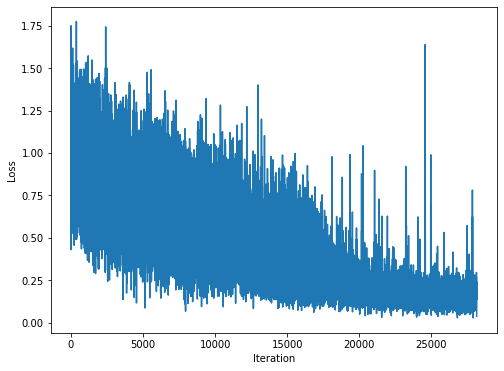

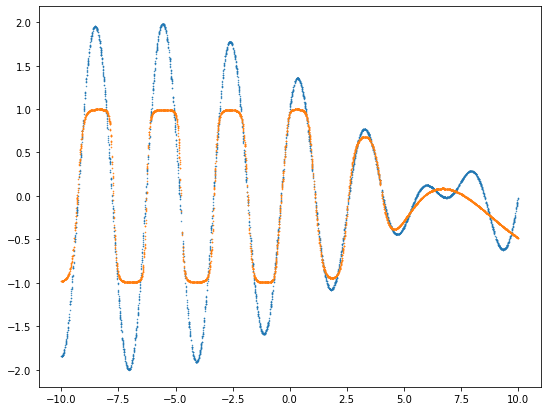

In [23]:
dataset_train = MyDataset(train_set, y_train_set)
dataset_val = MyDataset(val_set, y_val_set)
dataset_test = MyDataset(test_set, y_test_set)

print("Train set size: ", dataset_train.length)
print("Val set size: ", dataset_val.length)
print("Test set size: ", dataset_test.length)

losses, y_predict = run(dataset_train, dataset_val, dataset_test)

print("Final loss:", sum(losses[-100:])/100)
plot_loss(losses)

fig2 = plt.figure()
fig2.set_size_inches(9,7)
plt.scatter(test_set, y_test_set, marker='o', s=0.2)
plt.scatter(test_set, y_predict, marker='o', s=0.3)
plt.show()